<a href="https://colab.research.google.com/github/emrahyurtlu/Intro-to-tensorflow-for-deep-learning/blob/main/CMPE430/Lab_5_Model_Summary_Plot_Save_Load_and_Calculating_Number_of_Trainable_Parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CMPE430 LAB WEEK 5 - Model Summary/Plot/Save/Load and Calculating Number of Trainable Parameters**

18.11.2021 Thursday 14:30-16:20

Lab Assistant : Cansen Çağlayan (cansen.caglayan@atilim.edu.tr)

**References**

Book : Deep Learning with Python, François Chollet

https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://aldozaimi.wordpress.com/2020/02/13/determine-the-number-of-trainable-parameters-in-a-neural-network/

https://towardsdatascience.com/counting-no-of-parameters-in-deep-learning-models-by-hand-8f1716241889

In [ ]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

##**Example Model for Summary/Plot/Save/Load**

We can start off by defining a simple multilayer Perceptron model in Keras that we can use as the subject for summarization and visualization.

The model we will define has one input variable, a hidden layer with two neurons, and an output layer with one binary output.

For example:

[1 input] -> [2 neurons] -> [1 output]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Summarize Model :**

Keras provides a way to summarize a model.

The summary is textual and includes information about:

* The layers and their order in the model.
* The output shape of each layer.
* The number of parameters (weights) in each layer.
* The total number of parameters (weights) in the model.

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#how many parameters are trainable.
model.count_params()

7

**Exercise 1 :** Calculate the Number of Trainable Parameters



i = 1

h = 2 

o = 1

(ixh + hxo)+(h+o)

= (1x2 + 2x1)+ (2+1)

= 7

**Visualize Model :**

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

model: (required) The model that you wish to plot.

to_file: (required) The name of the file to which to save the plot.

show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.

show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.



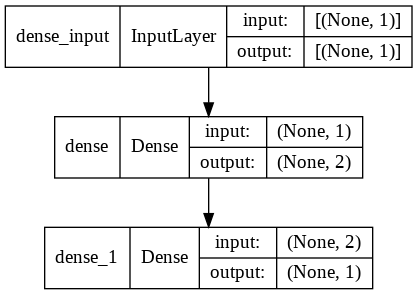

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Save a Model :**

In [ ]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


**Load a Model:**

In [ ]:
from keras.models import load_model
# load model
model2 = models.load_model('model.h5')
# summarize model.
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


###**How to determine the number of trainable parameters in a fully connected neural network ?**

In neural networks, the number of trainable parameters (also called weights) is an important hyperparameter. 

i, input size

h, size of hidden layer

o, output size

For one hidden layer,

**num_params = connections between layers + biases in every layer**

**= (i×h + h×o) + (h+o)**

**Exercise 1 :** Input size 3, hidden layer size 5, output size 2

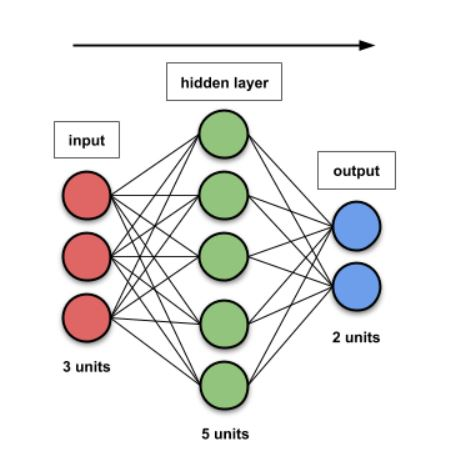

i = 3

h = 5

o = 2

**num_params = connections between layers + biases in every layer**

**= (i×h + h×o) + (h+o)**

= (3×5 + 5×2) + (5+2)

= 32

In [ ]:
input = Input((None, 3))
dense = Dense(5)(input)
output = Dense(2)(dense)
model = Model(input, output)

**Exercise 2:**


In [ ]:
input = Input((None, 50))
dense = Dense(100)(input)
dense = Dense(1)(dense)
dense = Dense(100)(dense)
output = Dense(50)(dense)
model = Model(input, output)

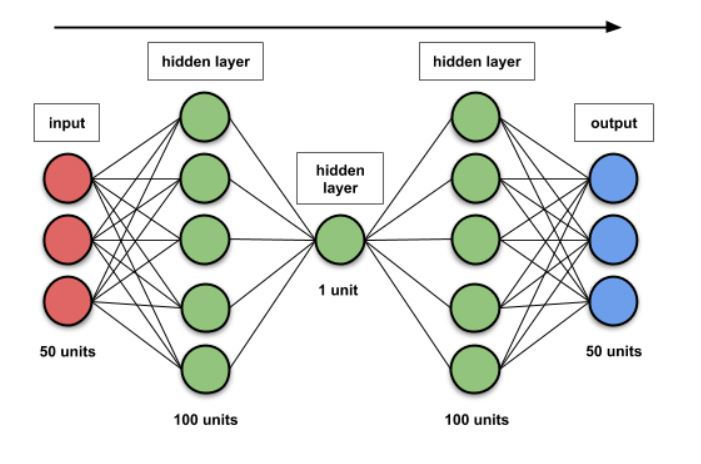

i = 50

h = 100, 1, 100

o = 50

num_params

= connections between layers + biases in every layer

= (50×100 + 100×1 + 1×100 + 100×50) + (100+1+100+50)

= 10,451

**Exercise 3:**

Determine the number of trainable parameters of the following neural net:

* Input layer: 4 units.
* Hidden layer 1: 16 units.
* Hidden layer 2: 8 units.
* Hidden layer 3: 4 units.
* Output layer: 2 units.

Solution: 262 trainable parameters.

##**MNIST EXAMPLE**

In [ ]:
#Load the Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
my_model = models.Sequential()
my_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
my_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
#Summarize the Model
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


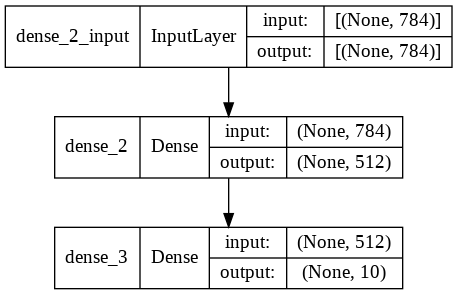

In [ ]:
#Plot the Model
plot_model(my_model, to_file='my_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Calculate the Number of Trainable Parameters

#number_of_parameters = (784x512 + 512x10)+(512+10)

In [ ]:
my_model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
#We also need to categorically encode the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Training occurs over epochs and each epoch is split into batches.

Epoch: One pass through all of the rows in the training dataset.

Batch: One or more samples considered by the model within an epoch before weights are updated.

One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. For more on the difference between epochs and batches, see the post:

In [ ]:
my_model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.2507 - accuracy: 0.9276
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1014 - accuracy: 0.9699
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0675 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0491 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0364 - accuracy: 0.9888


In [ ]:
#Save the Trained Model
my_model.save("my_model.h5")

In [ ]:
#Load the Trained Model
new_my_model = models.load_model('my_model.h5')

In [ ]:
#Evaluate the Loaded Model
test_loss, test_acc = new_my_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9785
test_acc: 0.9785000085830688
